# Assignment-04-Simple Linear Regression-1

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
# import dataset
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and VISUALIZATION:-

In [3]:
df.mean()

Delivery Time    16.790952
Sorting Time      6.190476
dtype: float64

In [4]:
df.median()

Delivery Time    17.83
Sorting Time      6.00
dtype: float64

In [5]:
df.mode()

,Delivery Time,Sorting Time
0,8.00,7.0
1,9.50,NaN
2,10.75,NaN
3,11.50,NaN
4,12.03,NaN
5,13.50,NaN
6,13.75,NaN
7,14.88,NaN
8,15.35,NaN
9,16.68,NaN


In [12]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

In [13]:
df.std()

Delivery Time    5.074901
Sorting Time     2.542028
dtype: float64

In [14]:
Range = df.max() - df.min()
Range

Delivery Time    21.0
Sorting Time      8.0
dtype: float64

0.3523900822831107


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

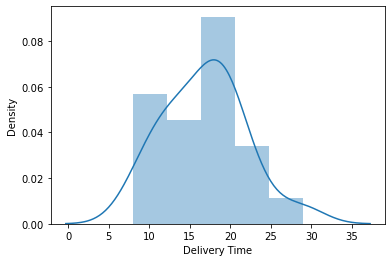

In [15]:
print(df["Delivery Time"].skew())
sns.distplot(df["Delivery Time"])

0.047115474210530174


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

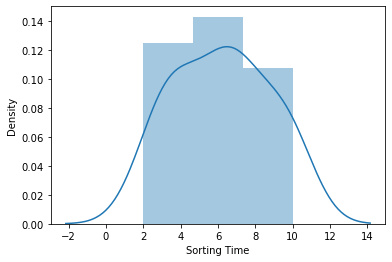

In [16]:
print(df["Sorting Time"].skew())
sns.distplot(df["Sorting Time"])

In [17]:
df.kurtosis()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

In [18]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Correlation plot:-

<AxesSubplot:>

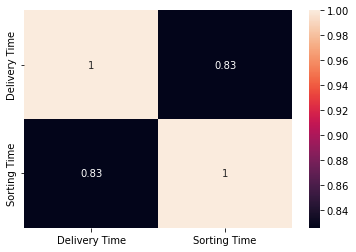

In [19]:
sns.heatmap(df.corr(),annot = True)

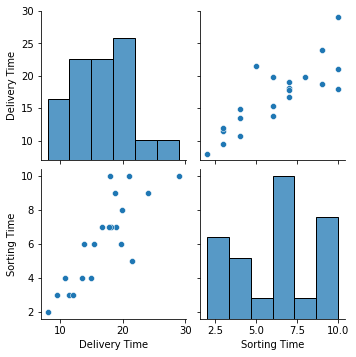

In [20]:
sns.pairplot(df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


{'whiskers': [<matplotlib.lines.Line2D at 0x1d8c508aa60>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8c508afa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8c508a790>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8c509a580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8c509a850>],
 'means': []}

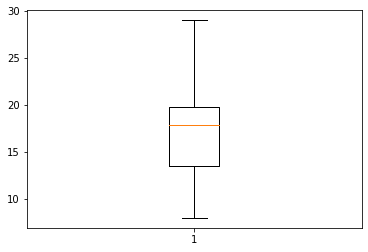

In [23]:
#this shows here is no outlier in Delivery time
plt.boxplot(df['Delivery Time']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8c50f04c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8c50f0a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8c50f01f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8c50fe040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8c50fe310>],
 'means': []}

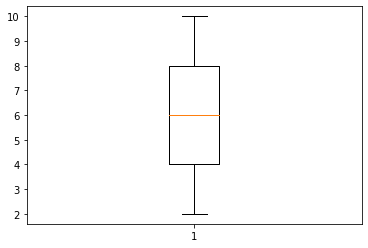

In [24]:
 #this also dont havee any outlier
plt.boxplot(df['Sorting Time']) 

## Feature Engineering

In [25]:
# Renaming Columns
dataset=df.rename({'Delivery Time':'d_time', 'Sorting Time':'s_time'},axis=1)
dataset

,d_time,s_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Defining Feature and Target from Dataset:-

In [26]:
# Feature
x=dataset['s_time']
# Target
y=dataset['d_time'] 

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='s_time', ylabel='d_time'>

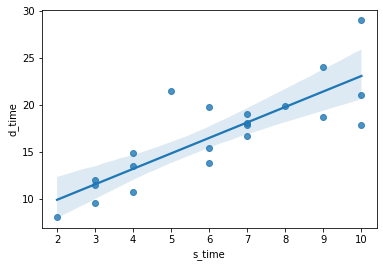

In [27]:
sns.regplot(x,y)

## Model Building

In [28]:
model=smf.ols("d_time~s_time",data=dataset).fit()

## Model Testing

In [29]:
# Finding Coefficient parameters
model.params

Intercept    6.582734
s_time       1.649020
dtype: float64

In [30]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept    3.823349
 s_time       6.387447
 dtype: float64,
 Intercept    0.001147
 s_time       0.000004
 dtype: float64)

In [31]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model Predictions

In [32]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [33]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [36]:
data_pred=pd.DataFrame(new_data,columns=['s_time'])
data_pred

,s_time
0,5
1,8


In [37]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# 1. NORMALIZATION (Using MinMax Scaler):-

In [38]:
df2 = dataset
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df2_scaled = pd.DataFrame(mm.fit_transform(df2))


In [39]:
x=df2_scaled.iloc[:,-1] # Feature
y=df2_scaled.iloc[:,0] # Target

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='0'>

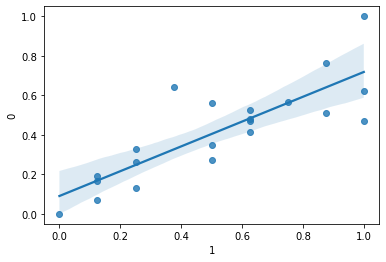

In [40]:
sns.regplot(x,y)

In [41]:
model=smf.ols("y~x",data=df2_scaled).fit()
model.params

Intercept    0.089561
x            0.628198
dtype: float64

In [42]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept    1.496005
 x            6.387447
 dtype: float64,
 Intercept    0.151079
 x            0.000004
 dtype: float64)

In [43]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# 2. Standard Scaler:-

In [44]:
df2 = dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df2_scaled = pd.DataFrame(ss.fit_transform(df2))

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='0'>

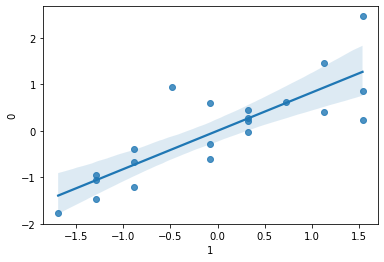

In [45]:
x=df2_scaled.iloc[:,-1] # Feature
y=df2_scaled.iloc[:,0] # Target
sns.regplot(x,y)

In [46]:
model=smf.ols("y~x",data=df2_scaled).fit()
model.params

Intercept   -5.134781e-16
x            8.259973e-01
dtype: float64

In [47]:
# Finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept   -3.970733e-15
 x            6.387447e+00
 dtype: float64,
 Intercept    1.000000
 x            0.000004
 dtype: float64)

In [48]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# 3. Log transformation:-

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Intercept    1.741987
x            0.597522
dtype: float64

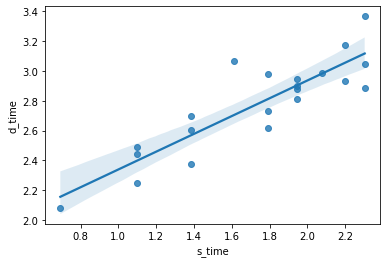

In [49]:
df2_scaled = np.log(df2)
x=df2_scaled.iloc[:,-1] # Feature
y=df2_scaled.iloc[:,0] # Target
sns.regplot(x,y)
model=smf.ols("y~x",data=df2_scaled).fit()
model.params

In [50]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

# 4. Squreroot Transformation:- 

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Intercept    1.613479
x            1.002217
dtype: float64

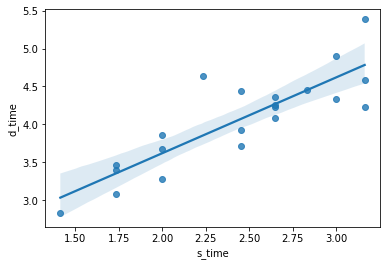

In [51]:
df2_scaled = np.sqrt(df2)
x=df2_scaled.iloc[:,-1] # Feature
y=df2_scaled.iloc[:,0] # Target
sns.regplot(x,y)
model=smf.ols("y~x",data=df2_scaled).fit()
model.params

In [52]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.7292011987544664, 0.7149486302678594)

# Conclusion :-
From Above analysis  it is clear that "LOG" transformation give  best R2 Score. 